In [1]:
from mpgm.mpgm.evaluation.generating_samples import *
from mpgm.mpgm.evaluation.evaluation_metrics import EvalMetrics
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
from mpgm.mpgm.model_fitters.prox_grad_fitters import Prox_Grad_Fitter, Constrained_Prox_Grad_Fitter
from mpgm.mpgm.evaluation.evaluation_metrics import *

from mpgm.mpgm.sample_generation.samplers import *

from mpgm.mpgm.evaluation.preprocessing import ClampMax

import numpy as np
import matplotlib.pyplot as plt


samples_file_name = "../samples.sqlite"
fit_file_name = "../fit_models.sqlite"
nr_variables = 10
nr_samples = 150
alpha = 0.5

# SGW = SampleParamsWrapper(nr_variables=nr_variables,
#                           sample_init=np.zeros((nr_variables, )),
#                           nr_samples=nr_samples,
#                           random_seed=1)
#
# SGW.graph_generator = LatticeGraphGenerator(sparsity_level=0)
# # SGW.weight_assigner = Constant_Weight_Assigner(ct_weight=-0.1)
# SGW.weight_assigner = Dummy_Weight_Assigner()
# # SGW.model = TPGM(R=10)
# SGW.model = Model(theta=np.zeros((nr_samples, nr_variables)))
# # SGW.sampler = TPGMGibbsSampler(burn_in=200, thinning_nr=150)
# SGW.sampler = SIPRVSampler(lambda_true=1, lambda_noise=0.5)
# SGW.generate_samples_and_save("SPGM_debug", samples_file_name)

samples_id = "SPGM_debug"
FPW = FitParamsWrapper(random_seed=0,
                       samples_file_name=samples_file_name)
FPW.model = SPGM(R=10, R0=5)

FPW.fitter = Constrained_Prox_Grad_Fitter(alpha=10,
                                          constraint_solver='osqp',
                                          save_regularization_paths=True,
                                          init_step_size=0.1,
                                          early_stop_criterion='likelihood')

FPW.preprocessor = ClampMax(10)

theta_init = np.random.normal(0, 0.1, (nr_variables, nr_variables))
theta_fit = FPW.fit_model_and_save(fit_id="SPGM_debug",
                                   fit_file_name=fit_file_name,
                                   parallelize=False,
                                   samples_file_name=samples_file_name,
                                   samples_id="SPGM_debug",
                                   theta_init=theta_init)

regularization_paths = FPW.FPS.regularization_paths

/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/qpsolvers/osqp_.py:101: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a csc_matrix rather than as a numpy.ndarray
  warn(conversion_warning("P"))
/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/qpsolvers/osqp_.py:122: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a csc_matrix rather than as a numpy.ndarray
  warn(conversion_warning("G"))


In [3]:
FPW.FPS.theta_fit.shape

(10, 10)

/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


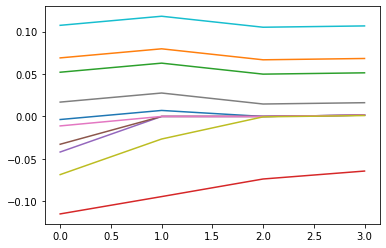

[[ 2.73496615e-05  1.20037687e-04  1.21212382e-04  1.21862296e-04
   1.06966223e-04  1.06650468e-04  1.21263250e-04  1.17606885e-04
   1.16003854e-04  1.02910613e-04]
 [ 2.43220810e-02  1.81641501e-03 -8.83132303e-24  9.52854510e-02
   3.22023622e-02  6.09977019e-02  9.38194947e-02  7.38219409e-02
  -7.05813757e-02  2.05856879e-02]
 [ 4.49824736e-25 -4.41070249e-02 -2.19774633e-24  4.49824736e-25
   4.59708055e-24  3.46625219e-02  1.97558069e-01  4.49824736e-25
   8.35691588e-02  4.87785556e-24]
 [ 7.06730019e-03  7.96952453e-02  6.28027836e-02 -9.44443197e-02
   4.26199563e-24 -7.88512396e-26  4.52500945e-24  2.75986210e-02
  -2.65975872e-02  1.18072172e-01]
 [ 6.98843527e-25  9.43124462e-02  1.74972922e-23  1.63904902e-02
   8.70573133e-24  4.09944201e-24  2.31773461e-02 -2.62505821e-23
  -1.58805782e-23  1.22827880e-01]
 [ 5.65761344e-02 -3.33387216e-24  4.79323704e-03 -4.34099943e-23
   3.68153732e-23  1.79903643e-23 -3.27515732e-23  3.99936260e-02
   4.94002773e-02  6.57578234e-03

In [7]:
node = 3
x = list(range(len(regularization_paths[node])))
for param in range(nr_variables):
    plt.plot(x, regularization_paths[node][:, param])
plt.show()

print(theta_fit)

/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


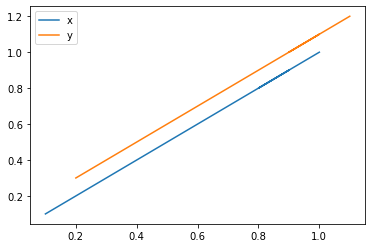

In [20]:
x = np.array([1, 0.8, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
y = np.array([1, 0.8, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
x2 = x + 0.1
y2 = y + 0.2
plt.plot(x, y, label='x')
plt.plot(x2, y2, label='y')
plt.legend()
plt.show()

In [9]:
class Boo():
    def f(self, a, b, c):
        d = dict(**locals())
        del d['self']
        print(d)

In [10]:
b = Boo()
b.f(1,2,3)

{'a': 1, 'b': 2, 'c': 3}


In [11]:
'_'.join(['animal1', 'animal2'])

'animal1_animal2'

In [20]:
def generate_experiment_name(model:str,
                             graph_type:str,
                             sample_gen_method:str,
                             experiment_shorthand:str,
                             early_stop_method:str,
                             *args) -> str:
    function_args = [model, graph_type, sample_gen_method, experiment_shorthand, early_stop_method] + list(args)
    return '_'.join(function_args)

In [21]:
generate_experiment_name('TPGM', 'lattice', 'SIPRV', 'vary_alpha', 'weight', 'sadge')

'TPGM_lattice_SIPRV_vary_alpha_weight_sadge'